## Homework 5 - Lynsey Kovar

In [97]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

### Part 1: Linear Regression with scikit-learn

In [18]:
# read wine datasets
whiteWine = pd.read_csv("winequality-white.csv", sep = ";")
redWine = pd.read_csv("winequality-red.csv", sep = ";")

# combine datasets
whiteWine['type'] = 'white'
redWine['type'] = 'red'
allWine = pd.concat([whiteWine, redWine])

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,white
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,white
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.6,6,white
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,white
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,white
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.0,6,white


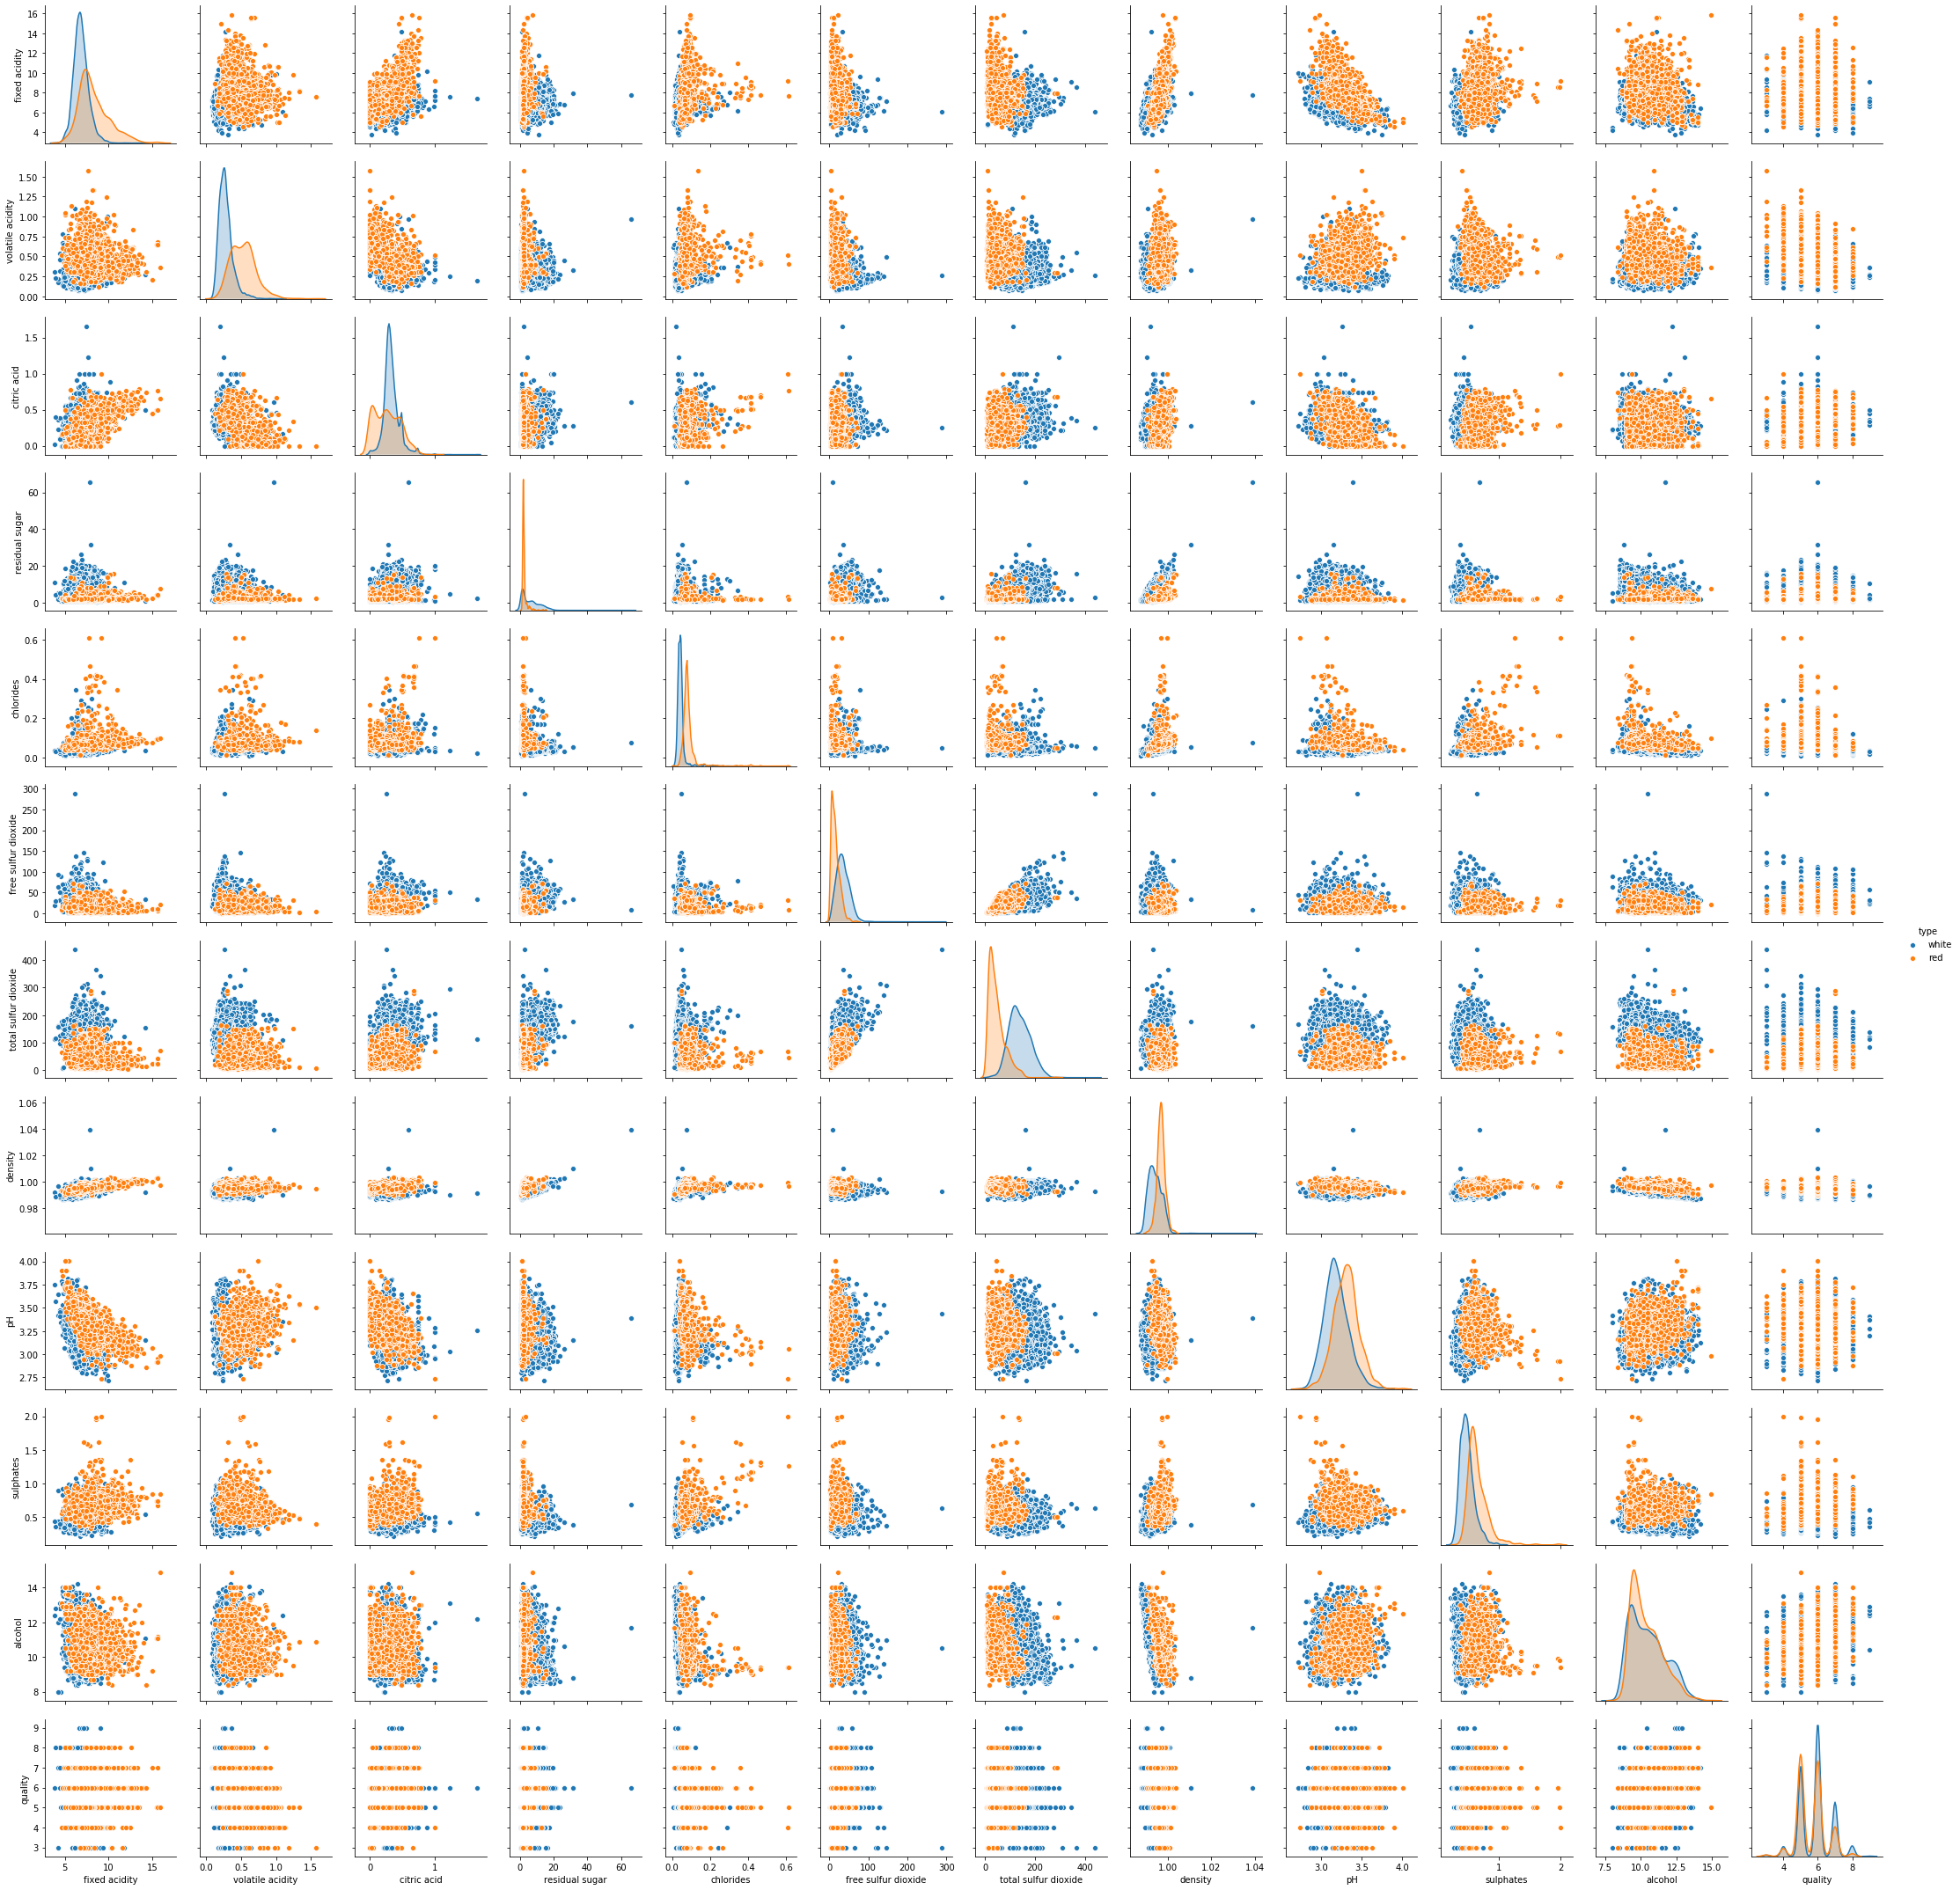

In [22]:
# make pairplot for whiteWine dataset
wine_pp = sns.pairplot(data = allWine, hue = 'type')
display(wine_pp)

### white wine multiple linear regression for quality

Text(0.5, 1.0, '$mean=0.00\\ std=0.75$')

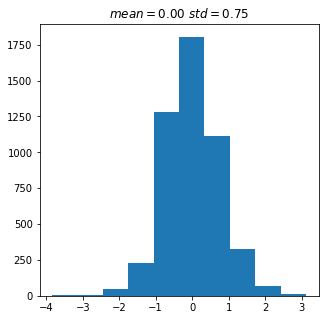

In [43]:
whiteWine_X = whiteWine.drop(columns=['quality', 'type'])
whiteWine_quality = whiteWine.quality
lr = LinearRegression()
whiteWine_lr_fit = lr.fit(whiteWine_X, whiteWine_quality)
whiteWine_quality_pred = whiteWine_lr_fit.predict(whiteWine_X)
whiteWine_error = whiteWine_quality - whiteWine_quality_pred
whiteWine_sse = np.sum(whiteWine_error**2)
whiteWine_rmse = np.sqrt(whiteWine_sse / len(whiteWine_quality))
whiteWine_sst = np.sum((whiteWine_quality - np.mean(whiteWine_quality))**2)
r2 = 1 - whiteWine_sse / whiteWine_sst

# plot error
f1 = plt.figure(figsize=(5,5))
ax_ww = f1.add_subplot(111)
ax_ww.hist(whiteWine_error)
ax_ww.set_title(f"$mean={np.mean(whiteWine_error):.2f}\ std={np.std(whiteWine_error):.2f}$")

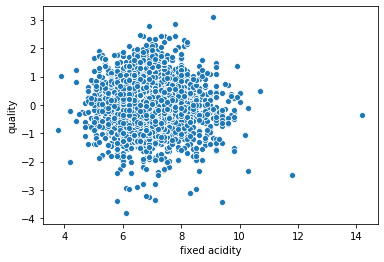

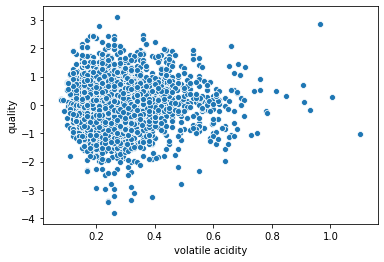

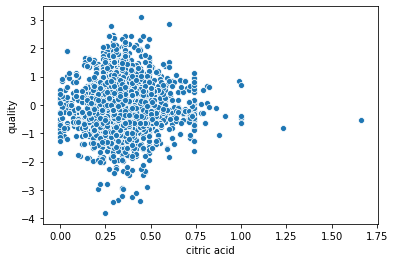

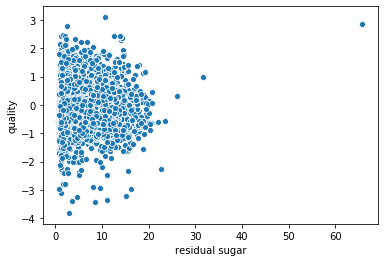

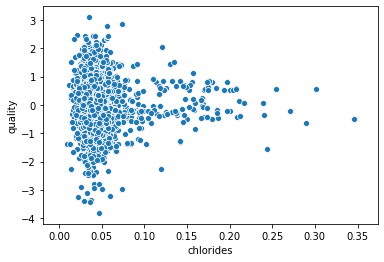

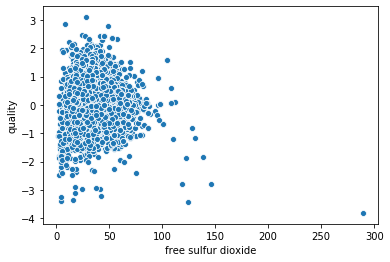

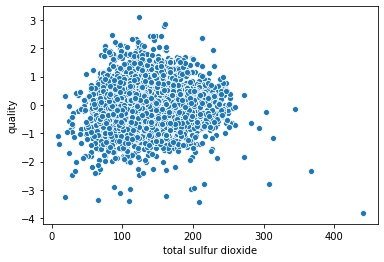

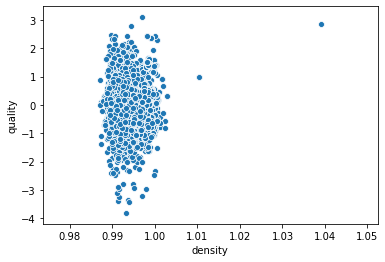

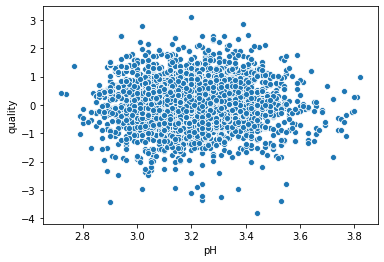

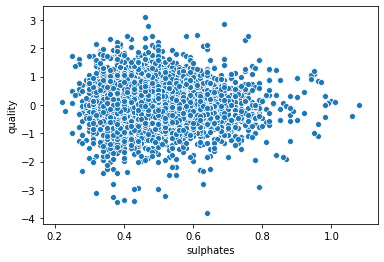

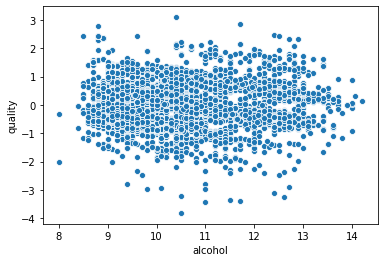

In [83]:
# plot whiteWine regression residuals for each variable
for column in whiteWine_X:
    plt.show(sns.scatterplot(whiteWine_X[column], whiteWine_error))

### red wine multiple linear regression for quality

Text(0.5, 1.0, '$mean=0.00\\ std=0.65$')

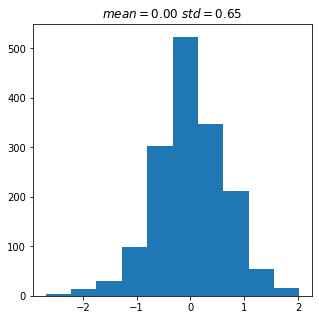

In [80]:
redWine_X = redWine.drop(columns=['quality', 'type'])
redWine_quality = redWine.quality
lr = LinearRegression()
redWine_lr_fit = lr.fit(redWine_X, redWine_quality)
redWine_quality_pred = redWine_lr_fit.predict(redWine_X)
redWine_error = redWine_quality - redWine_quality_pred
redWine_sse = np.sum(redWine_error**2)
redWine_rmse = np.sqrt(redWine_sse / len(redWine_quality))
redWine_sst = np.sum((redWine_quality - np.mean(redWine_quality))**2)
r2 = 1 - redWine_sse / redWine_sst

# plot error
f2 = plt.figure(figsize=(5,5))
ax_rw = f2.add_subplot(111)
ax_rw.hist(redWine_error)
ax_rw.set_title(f"$mean={np.mean(redWine_error):.2f}\ std={np.std(redWine_error):.2f}$")

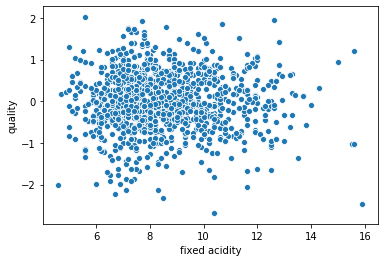

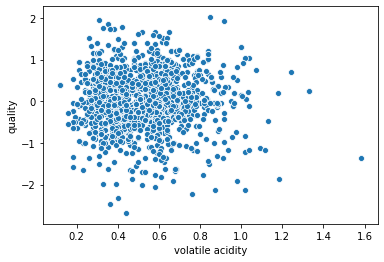

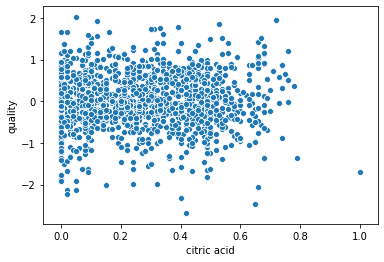

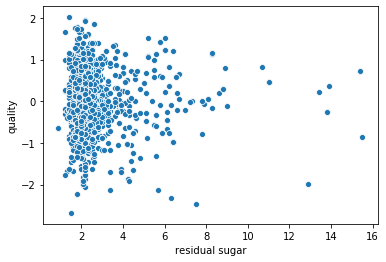

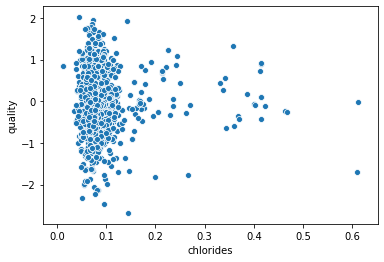

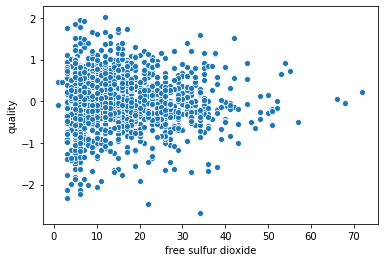

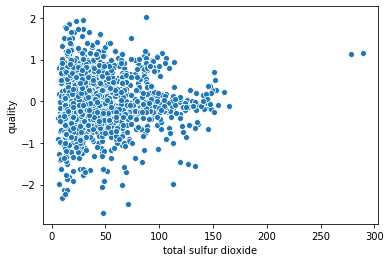

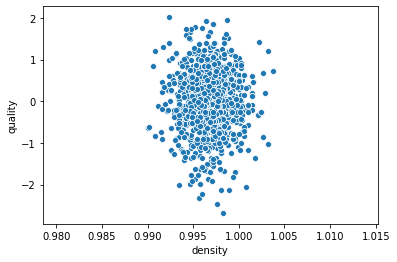

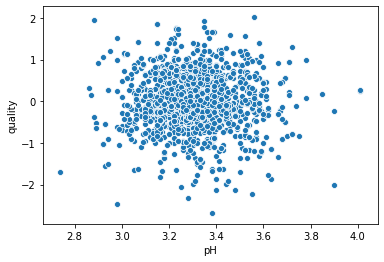

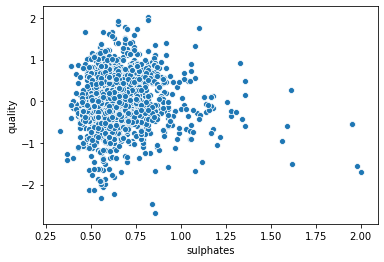

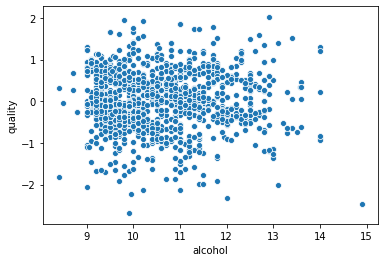

In [82]:
# plot redWine regression residuals for each variable
for column in redWine_X:
    plt.show(sns.scatterplot(redWine_X[column], redWine_error))

### combined wine dataset multiple linear regression for quality

Text(0.5, 1.0, '$mean=-0.00\\ std=0.73$')

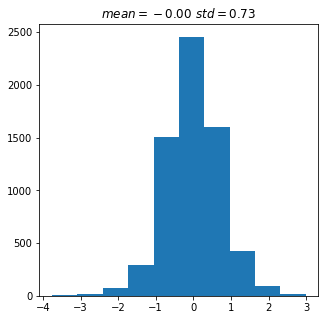

In [50]:
allWine_X = allWine.drop(columns=['quality', 'type'])
allWine_quality = allWine.quality
lr = LinearRegression()
allWine_lr_fit = lr.fit(allWine_X, allWine_quality)
allWine_quality_pred = allWine_lr_fit.predict(allWine_X)
allWine_error = allWine_quality - allWine_quality_pred
allWine_sse = np.sum(allWine_error**2)
allWine_rmse = np.sqrt(allWine_sse / len(allWine_quality))
allWine_sst = np.sum((allWine_quality - np.mean(allWine_quality))**2)
r2 = 1 - allWine_sse / allWine_sst

# plot error
f3 = plt.figure(figsize=(5,5))
ax_aw = f3.add_subplot(111)
ax_aw.hist(allWine_error)
ax_aw.set_title(f"$mean={np.mean(allWine_error):.2f}\ std={np.std(allWine_error):.2f}$")

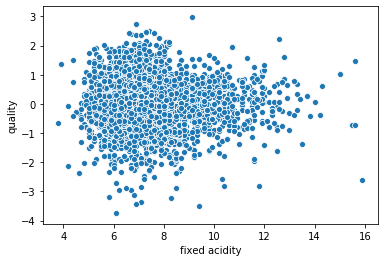

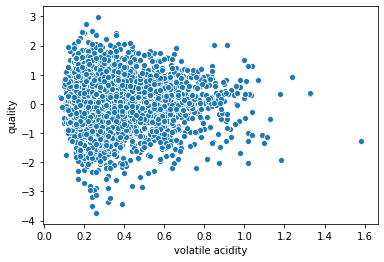

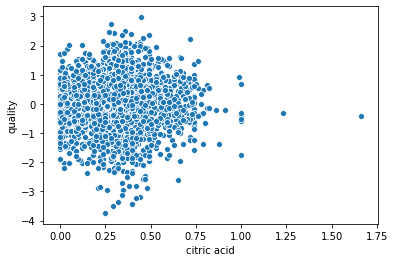

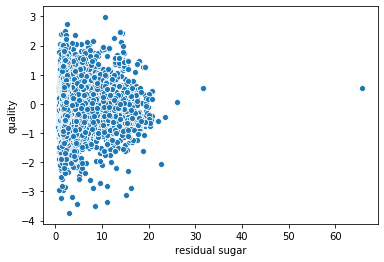

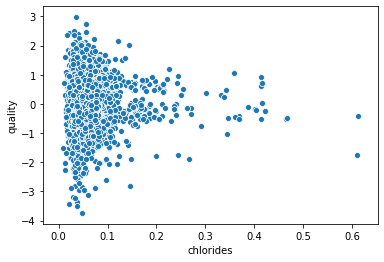

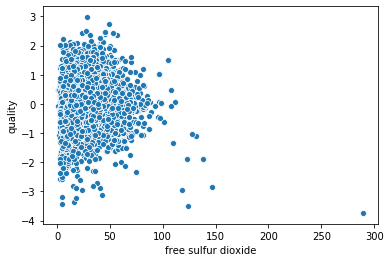

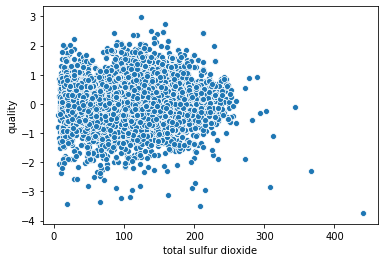

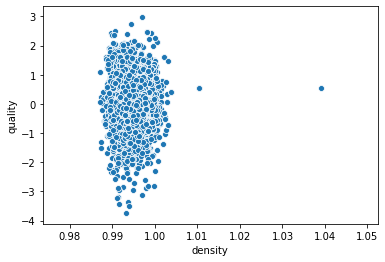

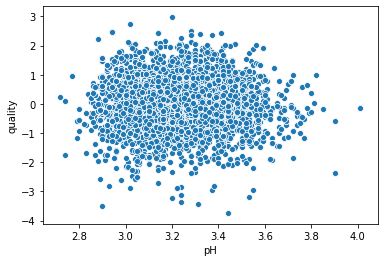

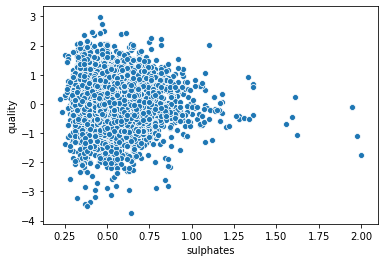

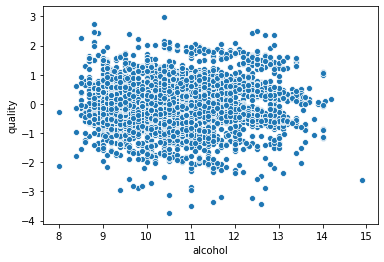

In [87]:
# plot combined wine regression residuals for each variable
for column in allWine_X:
    plt.show(sns.scatterplot(allWine_X[column], allWine_error))

## Part 2: Logistic regression with scikit-learn

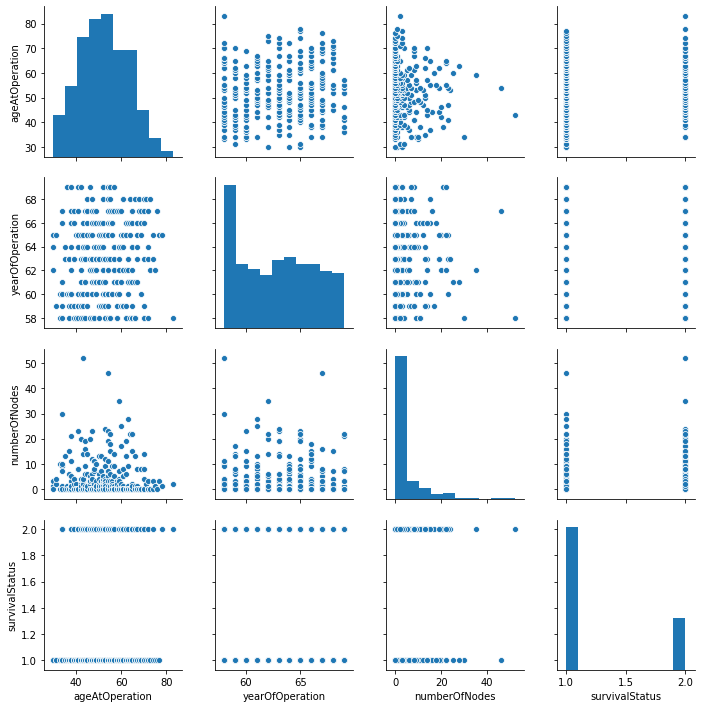

In [95]:
# read dataset
colnames = ['ageAtOperation', 'yearOfOperation', 'numberOfNodes', 'survivalStatus']
survival = pd.read_csv("haberman.data", names = colnames)

sns.pairplot(survival)

In [101]:
survival_X = survival.drop(columns='survivalStatus')
survival_survivalStatus = survival.survivalStatus
logreg = LogisticRegression(solver='lbfgs')
logreg.fit(survival_X, survival_survivalStatus)
survival_pred = logreg.predict(survival_X)
print(str(logreg.coef_) + ',' + str(logreg.intercept_))
display(confusion_matrix(survival_survivalStatus, survival_pred))

# based on the confusion matrix the logistic model has an accuracy of 

[[ 0.01988257 -0.00975411  0.08838822]],[-1.86233569]


array([[215,  10],
       [ 67,  14]])